<a href="https://colab.research.google.com/github/DeepikaNS-commits/NityaDS_INFO5731-Spring2025/blob/main/INFO5731_Assignment_3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# Write your code here
import pandas as pd
import re
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tree import Tree
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

# Load the dataset
df = pd.read_excel('Cleaned-narrators-dataset.xlsx')
print("Dataset Preview:")
print(df.head())
# Assuming the text column is named 'Cleaned_Bio'
texts = df['Cleaned_Bio'].tolist()


Dataset Preview:
           Narrator Name                                                Bio  \
0           Kay Aiko Abe  Nisei female. Born May 9, 1927, in Selleck, Wa...   
1                Art Abe  Nisei male. Born June 12, 1921, in Seattle, Wa...   
2  Sharon Tanagi Aburano  Nisei female. Born October 31, 1925, in Seattl...   
3        Toshiko Aiboshi  Nisei female. Born July 8, 1928, in Boyle Heig...   
4      Douglas L. Aihara  Sansei male. Born March 15, 1950, in Torrance,...   

                             Narrator URL  \
0   https://ddr.densho.org/narrators/361/   
1   https://ddr.densho.org/narrators/291/   
2   https://ddr.densho.org/narrators/293/   
3   https://ddr.densho.org/narrators/597/   
4  https://ddr.densho.org/narrators/1014/   

                                         Cleaned_Bio  
0  nisei femal born may selleck washington spent ...  
1  nisei male born june seattl washington grew ar...  
2  nisei femal born octob seattl washington famil...  
3  nisei femal bo

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

# Apply preprocessing to all texts
texts = [preprocess_text(text) for text in texts]
print(texts[:100])

['nisei femal born may selleck washington spent much childhood beaverton oregon father own farm influenc earli age parent convers christian world war ii remov portland assembl center oregon minidoka concentr camp idaho war work establish success volunt program feed homeless seattl washington', 'nisei male born june seattl washington grew area seattl japanes american attend univers washington japan bomb pearl harbor remov puyallup assembl center washington minidoka concentr camp idaho left minidoka sever time temporari work leav work farm area suffer tragic loss camp father got lost outsid collect wood perish element volunt armi serv signal corp eventu work civil aeronaut administr boe also one earli member seattl nisei veteran committe', 'nisei femal born octob seattl washington famili own oper success groceri store prior world war ii bomb pearl harbor remov puyallup assembl center washington minidoka concentr camp idaho left camp attend st mari school nurs rochest minnesota work medic

In [ ]:
def generate_ngrams(text, n):
    words = text.split()
    ngrams = []
    for i in range(len(words) - n + 1):
        ngrams.append(tuple(words[i:i + n]))
    return ngrams

def count_ngrams(texts, n):
    ngram_counts = {}
    for text in texts:
        ngrams = generate_ngrams(text, n)
        for ngram in ngrams:
            if ngram in ngram_counts:
                ngram_counts[ngram] += 1
            else:
                ngram_counts[ngram] = 1
    return ngram_counts

# Count bigrams and trigrams
bigram_counts = count_ngrams(texts, 2)
trigram_counts = count_ngrams(texts, 3)

print("Bigram Counts:", bigram_counts)
print("Trigram Counts:", trigram_counts)


Bigram Counts: {('nisei', 'femal'): 12, ('femal', 'born'): 16, ('born', 'may'): 3, ('may', 'selleck'): 1, ('selleck', 'washington'): 1, ('washington', 'spent'): 2, ('spent', 'much'): 1, ('much', 'childhood'): 1, ('childhood', 'beaverton'): 1, ('beaverton', 'oregon'): 1, ('oregon', 'father'): 1, ('father', 'own'): 1, ('own', 'farm'): 1, ('farm', 'influenc'): 1, ('influenc', 'earli'): 1, ('earli', 'age'): 3, ('age', 'parent'): 1, ('parent', 'convers'): 1, ('convers', 'christian'): 1, ('christian', 'world'): 1, ('world', 'war'): 23, ('war', 'ii'): 23, ('ii', 'remov'): 8, ('remov', 'portland'): 3, ('portland', 'assembl'): 3, ('assembl', 'center'): 19, ('center', 'oregon'): 3, ('oregon', 'minidoka'): 3, ('minidoka', 'concentr'): 14, ('concentr', 'camp'): 32, ('camp', 'idaho'): 13, ('idaho', 'war'): 3, ('war', 'work'): 2, ('work', 'establish'): 1, ('establish', 'success'): 2, ('success', 'volunt'): 1, ('volunt', 'program'): 1, ('program', 'feed'): 1, ('feed', 'homeless'): 1, ('homeless', 'se

In [ ]:
def calculate_bigram_probabilities(bigram_counts):
    word_counts = {}
    for bigram in bigram_counts:
        if bigram[0] in word_counts:
            word_counts[bigram[0]] += bigram_counts[bigram]
        else:
            word_counts[bigram[0]] = bigram_counts[bigram]

    bigram_probabilities = {}
    for bigram in bigram_counts:
        bigram_probabilities[bigram] = bigram_counts[bigram] / word_counts[bigram[0]]
    return bigram_probabilities

# Calculate bigram probabilities
bigram_probabilities = calculate_bigram_probabilities(bigram_counts)
print("Bigram Probabilities:", bigram_probabilities)


Bigram Probabilities: {('nisei', 'femal'): 0.4, ('femal', 'born'): 0.8421052631578947, ('born', 'may'): 0.08823529411764706, ('may', 'selleck'): 0.3333333333333333, ('selleck', 'washington'): 1.0, ('washington', 'spent'): 0.07142857142857142, ('spent', 'much'): 0.3333333333333333, ('much', 'childhood'): 1.0, ('childhood', 'beaverton'): 0.25, ('beaverton', 'oregon'): 1.0, ('oregon', 'father'): 0.125, ('father', 'own'): 0.0625, ('own', 'farm'): 0.3333333333333333, ('farm', 'influenc'): 0.125, ('influenc', 'earli'): 0.5, ('earli', 'age'): 0.6, ('age', 'parent'): 0.25, ('parent', 'convers'): 0.125, ('convers', 'christian'): 0.5, ('christian', 'world'): 1.0, ('world', 'war'): 1.0, ('war', 'ii'): 0.6216216216216216, ('ii', 'remov'): 0.36363636363636365, ('remov', 'portland'): 0.15, ('portland', 'assembl'): 0.375, ('assembl', 'center'): 1.0, ('center', 'oregon'): 0.15789473684210525, ('oregon', 'minidoka'): 0.375, ('minidoka', 'concentr'): 0.8235294117647058, ('concentr', 'camp'): 1.0, ('camp

In [ ]:
# Function to extract noun phrases using NLTK
def extract_noun_phrases(text):
    words = word_tokenize(text)
    tagged = pos_tag(words)

    noun_phrases = []
    temp_phrase = []

    for word, tag in tagged:
        if tag in ['NN', 'NNS', 'NNP', 'NNPS']:  # Noun tags
            temp_phrase.append(word)
        else:
            if temp_phrase:
                noun_phrases.append(' '.join(temp_phrase))
                temp_phrase = []

    if temp_phrase:
        noun_phrases.append(' '.join(temp_phrase))

    return noun_phrases

def calculate_relative_probabilities(texts):
    all_noun_phrases = {}
    review_noun_phrase_counts = []

    for text in texts:
        noun_phrases = extract_noun_phrases(text)
        noun_phrase_counts = {}
        for phrase in noun_phrases:
            if phrase in noun_phrase_counts:
                noun_phrase_counts[phrase] += 1
            else:
                noun_phrase_counts[phrase] = 1

            if phrase in all_noun_phrases:
                all_noun_phrases[phrase] += 1
            else:
                all_noun_phrases[phrase] = 1
        review_noun_phrase_counts.append(noun_phrase_counts)

    max_phrase_counts = {phrase: max([counts.get(phrase, 0) for counts in review_noun_phrase_counts]) for phrase in all_noun_phrases}

    relative_probabilities = []
    for noun_phrase_counts in review_noun_phrase_counts:
        review_probabilities = {phrase: (noun_phrase_counts.get(phrase, 0) / max_phrase_counts[phrase]) for phrase in all_noun_phrases}
        relative_probabilities.append(review_probabilities)

    return all_noun_phrases.keys(), relative_probabilities

# Calculate relative probabilities for noun phrases
noun_phrases, relative_probabilities = calculate_relative_probabilities(texts)

# Create a DataFrame to display the results
df_probabilities = pd.DataFrame(relative_probabilities, columns=noun_phrases)
print(df_probabilities)

    born  childhood beaverton  father  farm influenc earli age parent convers  \
0    1.0                  1.0     1.0                                     1.0   
1    0.0                  0.0     0.0                                     0.0   
2    0.0                  0.0     0.0                                     0.0   
3    0.0                  0.0     0.0                                     0.0   
4    0.0                  0.0     0.0                                     0.0   
5    0.0                  0.0     0.0                                     0.0   
6    0.0                  0.0     0.0                                     0.0   
7    0.0                  0.0     0.0                                     0.0   
8    0.0                  0.0     0.0                                     0.0   
9    0.0                  0.0     0.0                                     0.0   
10   0.0                  0.0     0.0                                     0.0   
11   0.0                  0.

In [ ]:
import re


def extract_noun_phrases(text):
    words = text.split()
    noun_phrases = []
    temp_phrase = []

    for word in words:
        if re.match(r'\b\w+\b', word):  # Match words that are not just punctuation
            temp_phrase.append(word)
        else:
            if temp_phrase:
                noun_phrases.append(' '.join(temp_phrase))
                temp_phrase = []

    if temp_phrase:
        noun_phrases.append(' '.join(temp_phrase))

    return noun_phrases

def calculate_relative_probabilities(texts):
    all_noun_phrases = {}
    review_noun_phrase_counts = []

    for text in texts:
        noun_phrases = extract_noun_phrases(text)
        noun_phrase_counts = {}
        for phrase in noun_phrases:
            if phrase in noun_phrase_counts:
                noun_phrase_counts[phrase] += 1
            else:
                noun_phrase_counts[phrase] = 1

            if phrase in all_noun_phrases:
                all_noun_phrases[phrase] += 1
            else:
                all_noun_phrases[phrase] = 1
        review_noun_phrase_counts.append(noun_phrase_counts)

    max_phrase_counts = {phrase: max([counts.get(phrase, 0) for counts in review_noun_phrase_counts]) for phrase in all_noun_phrases}

    relative_probabilities = []
    for noun_phrase_counts in review_noun_phrase_counts:
        review_probabilities = {phrase: (noun_phrase_counts.get(phrase, 0) / max_phrase_counts[phrase]) for phrase in all_noun_phrases}
        relative_probabilities.append(review_probabilities)

    return all_noun_phrases.keys(), relative_probabilities

# Calculate relative probabilities for noun phrases
noun_phrases, relative_probabilities = calculate_relative_probabilities(texts)

# Create a DataFrame to display the results
import pandas as pd
df_probabilities = pd.DataFrame(relative_probabilities, columns=noun_phrases)
print(df_probabilities)


    nisei femal born may selleck washington spent much childhood beaverton oregon father own farm influenc earli age parent convers christian world war ii remov portland assembl center oregon minidoka concentr camp idaho war work establish success volunt program feed homeless seattl washington  \
0                                                 1.0                                                                                                                                                                                                                                                    
1                                                 0.0                                                                                                                                                                                                                                                    
2                                                 0.0                                                     

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [ ]:
import math
import pandas as pd
import numpy as np
from collections import defaultdict

# Step 1: Load the Excel File
def load_data(file_path):
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    return df['Cleaned_Bio'].tolist()

# Step 2: Calculate TF-IDF Matrix
def calculate_tf(documents):
    tf = []
    for doc in documents:
        doc_tf = defaultdict(int)
        for word in doc.split():
            doc_tf[word.lower()] += 1
        tf.append(doc_tf)
    return tf

def calculate_idf(documents):
    idf = defaultdict(int)
    total_documents = len(documents)
    all_words = set(word.lower() for doc in documents for word in doc.split())

    for word in all_words:
        doc_count = sum(1 for doc in documents if word in doc.split())
        idf[word] = math.log(total_documents / (1 + doc_count))  # Adding 1 to avoid division by zero

    return idf

def calculate_tf_idf(tf, idf):
    tf_idf = []
    for doc_tf in tf:
        doc_tf_idf = {}
        for word, freq in doc_tf.items():
            doc_tf_idf[word] = freq * idf[word]
        tf_idf.append(doc_tf_idf)
    return tf_idf

# Step 3: Rank Documents Using Cosine Similarity
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    if norm_vec1 == 0 or norm_vec2 == 0:
        return 0  # Return similarity of 0 if either vector is a zero vector
    return dot_product / (norm_vec1 * norm_vec2)

def query_vector(query, idf, all_words):
    query_tf = defaultdict(int)
    for word in query.split():
        query_tf[word.lower()] += 1
    query_tf_idf = []
    for word in all_words:
        query_tf_idf.append(query_tf[word] * idf.get(word, 0))
    return np.array(query_tf_idf)


def document_vectors(tf_idf_matrix, all_words):
    vectors = []
    for doc in tf_idf_matrix:
        vec = [doc.get(word, 0) for word in all_words]
        vectors.append(np.array(vec))
    return vectors


# Main Function
if __name__ == "__main__":
    file_path = "Cleaned-narrators-dataset.xlsx"
    documents = load_data(file_path)

    tf = calculate_tf(documents)
    idf = calculate_idf(documents)
    tf_idf_matrix = calculate_tf_idf(tf, idf)

    print("TF-IDF Matrix:")
    for doc in tf_idf_matrix:
        print(doc)

    query = "An Outstanding movie with a haunting performance and best character development"
    query_vec = query_vector(query, idf, all_words)
    all_words = list(idf.keys())
    doc_vectors = document_vectors(tf_idf_matrix, all_words)

    similarity_scores = [cosine_similarity(query_vec, doc_vec) for doc_vec in doc_vectors]

    ranked_docs = sorted(zip(documents, similarity_scores), key=lambda x: x[1], reverse=True)

    print("\nRanked Documents:")
    for doc, score in ranked_docs:
        print(f"Document: {doc+1}\nScore: {score}\n")


TF-IDF Matrix:
{'nisei': 0.32158362412746233, 'femal': 0.6931471805599453, 'born': 0.13353139262452257, 'may': 2.302585092994046, 'selleck': 2.995732273553991, 'washington': 1.9616585060234524, 'spent': 2.302585092994046, 'much': 2.5902671654458267, 'childhood': 2.0794415416798357, 'beaverton': 2.995732273553991, 'oregon': 4.1588830833596715, 'father': 1.2039728043259361, 'own': 2.302585092994046, 'farm': 1.491654876777717, 'influenc': 2.5902671654458267, 'earli': 1.8971199848858813, 'age': 2.0794415416798357, 'parent': 1.491654876777717, 'convers': 2.5902671654458267, 'christian': 2.995732273553991, 'world': 0.5108256237659907, 'war': 0.7860851762192144, 'ii': 0.5108256237659907, 'remov': 0.6931471805599453, 'portland': 2.302585092994046, 'assembl': 0.6931471805599453, 'center': 0.6931471805599453, 'minidoka': 0.9808292530117262, 'concentr': 0.3566749439387324, 'camp': 0.32158362412746233, 'idaho': 0.9162907318741551, 'work': 0.9808292530117262, 'establish': 1.742969305058623, 'succes

In [ ]:
# # Step 1: Vectorize the documents and query
# def vectorize(document, vocab):
#     vec = [0] * len(vocab)
#     words = tokenize(document)
#     for word in words:
#         if word in vocab:
#             vec[vocab[word]] += 1
#     return vec

# # Step 2: Compute cosine similarity
# def cosine_similarity(vec1, vec2):
#     dot_product = sum(a * b for a, b in zip(vec1, vec2))
#     norm1 = math.sqrt(sum(a * a for a in vec1))
#     norm2 = math.sqrt(sum(a * a for a in vec2))
#     return dot_product / (norm1 * norm2)

# # Define your query
# query = "An outstanding movie with a haunting performance and best character development"
# vocab = {word: idx for idx, word in enumerate(set([word for doc in documents for word in tokenize(doc)]))}

# query_vec = vectorize(query, vocab)
# doc_vectors = [vectorize(doc, vocab) for doc in documents]

# # Calculate cosine similarities
# cos_sim = [cosine_similarity(query_vec, doc_vec) for doc_vec in doc_vectors]

# # Rank documents
# ranked_docs = sorted(enumerate(cos_sim), key=lambda x: x[1], reverse=True)

# # Display ranked documents
# print("Ranked Documents based on Query:")
# for idx, sim in ranked_docs:
#     print(f"Document {idx+1}: Cosine Similarity = {sim:.4f}")


Ranked Documents based on Query:
Document 2: Cosine Similarity = 1.0000
Document 1: Cosine Similarity = 0.6396
Document 3: Cosine Similarity = 0.4558


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
# Write your code here
!pip install gensim
!pip install openpyxl
!pip install sklearn
!pip install matplotlib
!pip install seaborn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [6]:
import pandas as pd
from gensim.models import Word2Vec
import math

# Load the Excel File
def load_data(file_path):
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    return df['Cleaned_Bio'].tolist()

documents = load_data('Cleaned-narrators-dataset.xlsx')

# Function to preprocess the documents (simple tokenization)
def tokenize(document):
    return document.lower().split()

# Preprocess the data
def preprocess_data(documents):
    preprocessed_docs = []
    for doc in documents:
        words = doc.split()
        preprocessed_docs.append(words)
    return preprocessed_docs
print(preprocessed_docs)
# Train the Word2Vec model
def train_word2vec_model(documents, vector_size=300, window=5, min_count=1, workers=4):
    model = Word2Vec(documents, vector_size=vector_size, window=window, min_count=min_count, workers=workers)
    return model

# Main Function
if __name__ == "__main__":
    file_path = "Cleaned-narrators-dataset.xlsx"
    documents = load_data(file_path)
    preprocessed_docs = preprocess_data(documents)
    word2vec_model = train_word2vec_model(preprocessed_docs)

    # Save the model
    word2vec_model.save("word2vec.model")
    print("Word2Vec model trained and saved!")



[['nisei', 'femal', 'born', 'may', 'selleck', 'washington', 'spent', 'much', 'childhood', 'beaverton', 'oregon', 'father', 'own', 'farm', 'influenc', 'earli', 'age', 'parent', 'convers', 'christian', 'world', 'war', 'ii', 'remov', 'portland', 'assembl', 'center', 'oregon', 'minidoka', 'concentr', 'camp', 'idaho', 'war', 'work', 'establish', 'success', 'volunt', 'program', 'feed', 'homeless', 'seattl', 'washington'], ['nisei', 'male', 'born', 'june', 'seattl', 'washington', 'grew', 'area', 'seattl', 'japanes', 'american', 'attend', 'univers', 'washington', 'japan', 'bomb', 'pearl', 'harbor', 'remov', 'puyallup', 'assembl', 'center', 'washington', 'minidoka', 'concentr', 'camp', 'idaho', 'left', 'minidoka', 'sever', 'time', 'temporari', 'work', 'leav', 'work', 'farm', 'area', 'suffer', 'tragic', 'loss', 'camp', 'father', 'got', 'lost', 'outsid', 'collect', 'wood', 'perish', 'element', 'volunt', 'armi', 'serv', 'signal', 'corp', 'eventu', 'work', 'civil', 'aeronaut', 'administr', 'boe', '

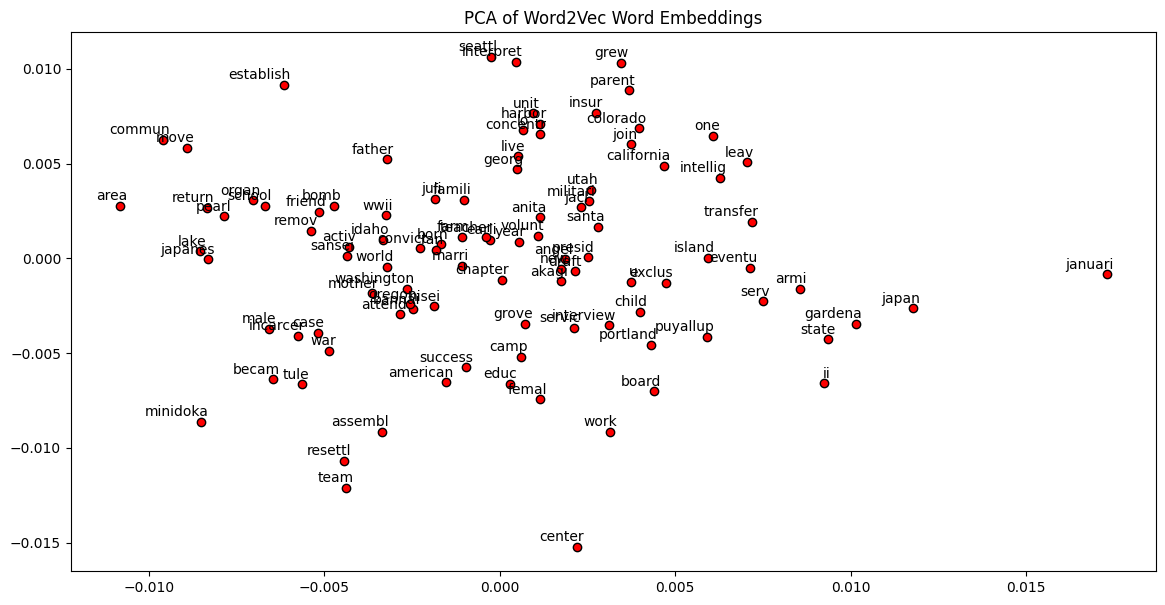

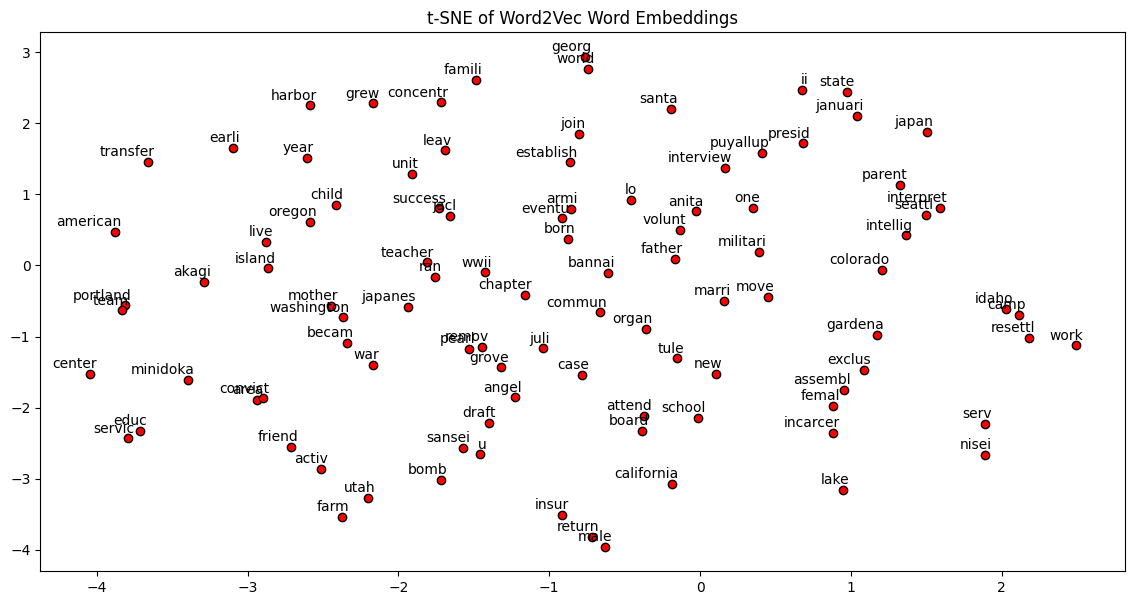

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load the trained Word2Vec model
word2vec_model = Word2Vec.load("word2vec.model")

# Get word vectors for visualization
def get_word_vectors(model, num_words=100):
    words = list(model.wv.index_to_key)[:num_words]
    word_vectors = np.array([model.wv[word] for word in words])
    return words, word_vectors

# Plot PCA
def plot_pca(words, word_vectors):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(word_vectors)

    plt.figure(figsize=(14, 7))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], edgecolors='k', c='r')
    for i, word in enumerate(words):
        plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.title('PCA of Word2Vec Word Embeddings')
    plt.show()

# Plot t-SNE
def plot_tsne(words, word_vectors):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_result = tsne.fit_transform(word_vectors)

    plt.figure(figsize=(14, 7))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], edgecolors='k', c='r')
    for i, word in enumerate(words):
        plt.annotate(word, xy=(tsne_result[i, 0], tsne_result[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.title('t-SNE of Word2Vec Word Embeddings')
    plt.show()

# Visualize embeddings
words, word_vectors = get_word_vectors(word2vec_model)
plot_pca(words, word_vectors)
plot_tsne(words, word_vectors)



In [ ]:
from numpy import dot
from numpy.linalg import norm

# Cosine similarity function
def cosine_similarity(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

# Calculate cosine similarity between word pairs
def calculate_similarity(model, word_pairs):
    similarities = {}
    for word1, word2 in word_pairs:
        if word1 in model.wv.key_to_index and word2 in model.wv.key_to_index:
            similarity = cosine_similarity(model.wv[word1], model.wv[word2])
            similarities[(word1, word2)] = similarity
        else:
            similarities[(word1, word2)] = 'One or both words not in vocabulary'
    return similarities

# Example word pairs
word_pairs = [('nisei', 'japanese'), ('war', 'army'), ('camp', 'concentration'), ('father', 'mother')]

# Calculate and print similarities
similarities = calculate_similarity(word2vec_model, word_pairs)
for pair, similarity in similarities.items():
    print(f"Cosine similarity between {pair[0]} and {pair[1]}: {similarity}")



Cosine similarity between nisei and japanese: One or both words not in vocabulary
Cosine similarity between war and army: One or both words not in vocabulary
Cosine similarity between camp and concentration: One or both words not in vocabulary
Cosine similarity between father and mother: 0.10068181902170181


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


italicized text






1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [11]:
# The GitHub link of your final csv file
tweets-annotated.csv

# Link:
https://github.com/DeepikaNS-commits/NityaDS_INFO5731-Spring2025/blob/main/tweets-annotated.csv?plain=1


Columns in the DataFrame: Index(['Narrator Name', 'Bio', 'Narrator URL', 'Cleaned_Bio'], dtype='object')
Sample data:            Narrator Name                                                Bio  \
0           Kay Aiko Abe  Nisei female. Born May 9, 1927, in Selleck, Wa...   
1                Art Abe  Nisei male. Born June 12, 1921, in Seattle, Wa...   
2  Sharon Tanagi Aburano  Nisei female. Born October 31, 1925, in Seattl...   
3        Toshiko Aiboshi  Nisei female. Born July 8, 1928, in Boyle Heig...   
4      Douglas L. Aihara  Sansei male. Born March 15, 1950, in Torrance,...   

                             Narrator URL  \
0   https://ddr.densho.org/narrators/361/   
1   https://ddr.densho.org/narrators/291/   
2   https://ddr.densho.org/narrators/293/   
3   https://ddr.densho.org/narrators/597/   
4  https://ddr.densho.org/narrators/1014/   

                                         Cleaned_Bio  
0  nisei femal born may selleck washington spent ...  
1  nisei male born june se

# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer